# Precipitation exercises
***

## <font color=steelblue>Exercise 2 - Double-mass curve<br>

<font color=steelblue>The table *2MassCurve* in the file *RainfallData.xlsx* provides annual precipitation measured over a 17-year period at five gages in a region. Gage C was moved at the end of 1977. Carry out a double-mass curve analysis to check for consistency in the record of that gage C, and make appropriate adjustments to correct for any inconsistencies.</font>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

## Introduction
A **double mass curve** is a plot of the cumulative data of one variable against the cumulative data of another variable (or against the average cumulative values of the same variable in different locations) during the same period.
    
<img src="img/Double mass curve.JPG" alt="Mountain View" style="width:450px">

> <font color=grey>Double-mass curve of precipitation data. *[(Double-Mass Curves. USGS, 1960)](https://pubs.usgs.gov/wsp/1541b/report.pdf)*.</font>
    
If no change occurred during the period, the plot must be a straight line in which slope is the constant of proportionality between series. A break in the slope means that a change in the constant of proportionality.

The double-mass curve, when applied to precipitation, adopts the form $Y=m \cdot X$, where $b$ is the slope. This form implies that the line should not have an intercept.

### Import data

In [2]:
# import data from sheet '2MassCurve' in file 'RainfallData.xlxs'
data2 = pd.read_excel('..\data\RainfallData.xlsx', sheet_name='2MassCurve',
                      skiprows=4,
             index_col=0, usecols=range(6))
data2.describe()

,A,B,C,D,E
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1094.588235,1059.058824,974.529412,972.117647,1093.058824
std,154.527125,161.344922,214.418142,154.720669,185.289460
min,801.000000,751.000000,710.000000,683.000000,771.000000
25%,1010.000000,978.000000,825.000000,875.000000,967.000000
50%,1140.000000,1056.000000,933.000000,981.000000,1135.000000
75%,1170.000000,1161.000000,1058.000000,1056.000000,1190.000000
max,1411.000000,1353.000000,1584.000000,1286.000000,1483.000000


### The double-mass curve

In [3]:
# compute annual average across all gages
data2['AVG'] = data2.mean(axis=1)
data2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010,1161,780,949,1135,1007.0
1971,1005,978,1041,784,970,955.6
1972,1067,1226,1027,1067,1158,1109.0
1973,1051,880,825,1014,1022,958.4
1974,801,1146,933,923,821,924.8


__Visualize the data__<br>
We will create first a scatter plot comparing the annual series of precipitation in gage C against the average across gages. 

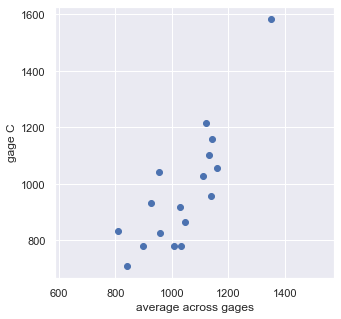

In [4]:
# scatter plot of annual precipitation
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.scatter(data2.AVG, data2.C)
plt.xlabel('average across gages')
plt.ylabel('gage C');

This type of plot has a large dispersion, so it isn't convenient to spot anomalies. We can neither see trends nor the year with possible errors in the data set.

Instead, we will plot a __double mass curve__. This plot  is created from the series of __accumulated precipitation__. This way, the plot must have always a positive and continues trend, allowing us to identity anomalies in the precipitation records.

The function `cumsum` in `NumPy` calculates the accumulated series from a series of data. For instance:

In [5]:
# annual series of accumulated precipitation
data2.cumsum()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010.0,1161.0,780.0,949.0,1135.0,1007.0
1971,2015.0,2139.0,1821.0,1733.0,2105.0,1962.6
1972,3082.0,3365.0,2848.0,2800.0,3263.0,3071.6
1973,4133.0,4245.0,3673.0,3814.0,4285.0,4030.0
1974,4934.0,5391.0,4606.0,4737.0,5106.0,4954.8
1975,6345.0,6744.0,6190.0,5667.0,6589.0,6307.0
1976,7567.0,7762.0,7405.0,6648.0,7763.0,7429.0
1977,8579.0,8513.0,8237.0,7331.0,8534.0,8238.8
1978,9732.0,9572.0,9155.0,8155.0,9722.0,9267.2


To avoid duplication of data, we will not save the previous accumulated series, but we will be using the function `cumsum` very often in the following.

Let's plot the double-mass curve for station C.

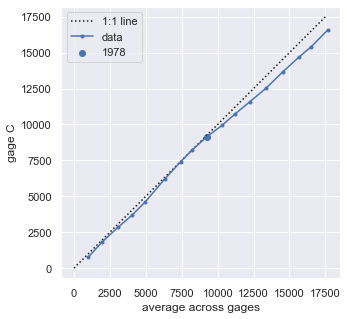

In [6]:
plt.figure(figsize=(5, 5))
# line of slope 1
plt.plot((0, 17500), (0, 17500), ':k', label='1:1 line')
# double-mass curve
plt.plot(data2.AVG.cumsum(), data2.C.cumsum(), '.-', label='data')
# year 1978
plt.scatter(data2.AVG.cumsum().loc[1978], data2.C.cumsum().loc[1978], label='1978')

# configuration
plt.axis('equal')
plt.xlabel('average across gages')
plt.ylabel('gage C')
plt.legend();

We can clearly observe a break in the line in year from year 1918 onwards, exactly matching the year in which the station C was moved.

### Correct series
To correct the series we must decide whether we trust the data before or after the break in the double-mass curve. For that, we would need further information about the location and instruments used. In this exercise, we will assume that the data up till 1978 is the one we trust the most, and we will fix the series from 1979 on.

The steps are the following:
1. Calculate the slope of the first part of the double-mass curve ($m_1$).
2. Calculate the slope of the second part of the double-mass curve ($m_2$).
3. Correct the series. Assuming that the correct slope is $m_1$, the corrected precipitation $P_c$ for the observed data $P_o$ is:
$$P_c = \frac{m_1}{m_2} \cdot P_o$$

Therefore, we need to learn how to fit the slope of a linear regression of the form $y = m\cdot x$. We will first define a function that represents that form of the linear regression and later on we will use the function `scipy.optimize.curve_fit` to fit the slope $m$.

In [7]:
def linear_reg(x, m):
    """Linear regression with intercept 0: 
            y = m · x
    
    Input:
    ------
    x:         float. Independet value
    m:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = m * x
    
    return y

In [8]:
# import function scipy.optimize.curve_fit
from scipy.optimize import curve_fit

#### Fit the regression for the first part
This first time we will do it step by step.

In [9]:
# define x and y in the linear regression
x = data2.loc[:1978, 'AVG']
y = data2.loc[:1978, 'C']

In [10]:
# compute cumulative series
x = x.cumsum()
y = y.cumsum()

In [11]:
# fit the regression up till 1978
m1 = curve_fit(linear_reg, x, y)[0][0]
print('m1 = {0:.3f}'.format(m1))

m1 = 0.979


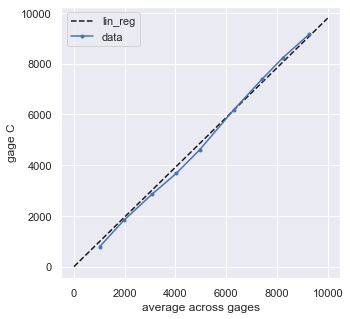

In [12]:
plt.figure(figsize=(5, 5))
# linear regression
x_ = np.array([0, 10000])
y_ = m1 * x_
plt.plot(x_, y_, linestyle='--', color='k', label='lin_reg')
# double-mass curve
plt.plot(x, y, '.-', label='data')

# configuration
plt.axis('equal')
plt.xlabel('average across gages')
plt.ylabel('gage C')
plt.legend();

#### Fit the regression for the second part

In [13]:
# fit the regression from 1978 onwards
m2 = curve_fit(linear_reg, data2.loc[1978:, 'AVG'].cumsum(), data2.loc[1978:, 'C'].cumsum())[0][0]
print('m1 = {0:.3f}'.format(m2))

m1 = 0.866


#### Correct the data

In [14]:
# correction factor
factor = m1 / m2
print('correction factor = {0:.3f}'.format(factor))

correction factor = 1.131


In [15]:
# copy the original data in a new column
data2['C_'] = data2['C']
#multiply the second period by the correction factor
data2.loc[1979:, 'C_'] *= factor

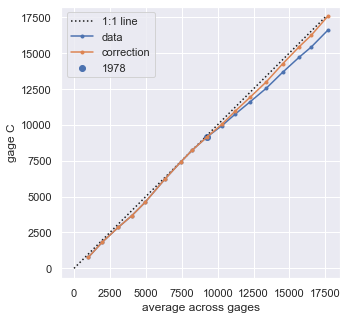

In [16]:
plt.figure(figsize=(5, 5))
# line of slope 1
plt.plot((0, 17500), (0, 17500), ':k', label='1:1 line')
# double-mass curve
plt.plot(data2.AVG.cumsum(), data2.C.cumsum(), '.-', label='data')
plt.plot(data2.AVG.cumsum(), data2.C_.cumsum(), '.-', label='correction')
# year 1978
plt.scatter(data2.AVG.cumsum().loc[1978], data2.C.cumsum().loc[1978], label='1978')

# configuration
plt.axis('equal')
plt.xlabel('average across gages')
plt.ylabel('gage C')
plt.legend();

# save figure
plt.savefig('../output/Ex2_double-mass curve.png', dpi=300)

In [17]:
data2_ = data2[['A', 'B', 'C_', 'D', 'E']]
data2_.columns = ['A', 'B', 'C', 'D', 'E']
data2_ = data2_.astype(float)

In [18]:
data2_.to_csv('../output/Ex2_corrected series.csv', float_format='%.0f')

### Useful links:
[USGS report on double-mass curves](https://pubs.usgs.gov/wsp/1541b/report.pdf)<br>
[`SciPy.optimize.curve_fit` help](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)